# Building a Portfolio using Markowitz's Modern Portfolio Theory

Modern Portfolio Theory is method used for selecting investments in order to maximize their overall profit in with a given level of risk. Modern Portfolio Theory suggests diversification of all your securities and asset classes and not putting all your eggs in one basket. It emphasises the importance of portfolios, diversification, risk and the connections among different kinds of securities.

This project aims to build an optimal portfolio of different assests from Technology Companies in the S&P 500.

## Data

The data used during the lifespan of this project was read in from the yahoo finance website using the *yfinance* package. It includes the closing stock price for 7 of the largest tech companies in the world.
It can be accessed via the link below: https://finance.yahoo.com/quote/%5ESP500-45/history/

## Features
 The companies used for building our portfolio includes:

 - AAPL: Apple Inc.
 - MSFT: Microsoft Corporation
 - TSLA: Tesla, Inc.
 - NFLX: Netflix
 - IBM: IBM
 - META: Meta Platforms
 - AMZN: Amazon
 - GOOG: Alphabet Inc.

## Data Loading and Preparation 

In [1]:
# Importing the tools we need
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from datetime import datetime, timedelta
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [2]:
# Stocks to be included in the portfolio 
stocks=["AAPL","MSFT","TSLA","NFLX","IBM","META","AMZN","GOOG"]

In [3]:
# End date is current date at time of running the project 
end_date = datetime.today().strftime('%Y-%m-%d')

# Start date chosen was 2500 days previously from the current/end date. This captures the major trends of volatility of each asset
start_date = (datetime.today() - timedelta(days=2500)).strftime('%Y-%m-%d')

In [4]:
df = pd.DataFrame()
for stock in stocks:
    df[stock] = yf.download(tickers=stock, start=start_date,end=end_date)["Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1719 entries, 2017-11-13 to 2024-09-13
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1719 non-null   float64
 1   MSFT    1719 non-null   float64
 2   TSLA    1719 non-null   float64
 3   NFLX    1719 non-null   float64
 4   IBM     1719 non-null   float64
 5   META    1719 non-null   float64
 6   AMZN    1719 non-null   float64
 7   GOOG    1719 non-null   float64
dtypes: float64(8)
memory usage: 120.9 KB
None


,AAPL,MSFT,TSLA,NFLX,IBM,META,AMZN,GOOG
Date,,,,,,,,
2017-11-13,43.492500,83.930000,21.026667,195.080002,141.873810,178.770004,56.458500,51.287498
2017-11-14,42.834999,84.050003,20.580000,195.710007,142.342255,178.070007,56.841999,51.299999
2017-11-15,42.270000,82.980003,20.753332,192.119995,140.630981,177.949997,56.334499,51.045502
2017-11-16,42.775002,83.199997,20.833332,195.509995,142.562134,179.589996,56.864498,51.625000
2017-11-17,42.537498,82.400002,21.003332,193.199997,142.418732,179.000000,56.493999,50.954498


## Daily return for each stock

Note: In finance, the log function is generally used for stock returns 

In [6]:
df_return= np.log(df).pct_change().dropna()
df_return.head()

,AAPL,MSFT,TSLA,NFLX,IBM,META,AMZN,GOOG
Date,,,,,,,,
2017-11-14,-0.004038,0.000323,-0.007050,0.000611,0.000665,-0.000757,0.001678,0.000062
2017-11-15,-0.003534,-0.002891,0.002773,-0.003509,-0.002439,-0.000130,-0.002220,-0.001263
2017-11-16,0.003172,0.000599,0.001269,0.003327,0.002757,0.001771,0.002323,0.002870
2017-11-17,-0.001482,-0.002185,0.002676,-0.002253,-0.000203,-0.000634,-0.001618,-0.003315
2017-11-20,-0.000267,0.000357,-0.006645,0.000883,0.002074,-0.000280,-0.000784,-0.000177


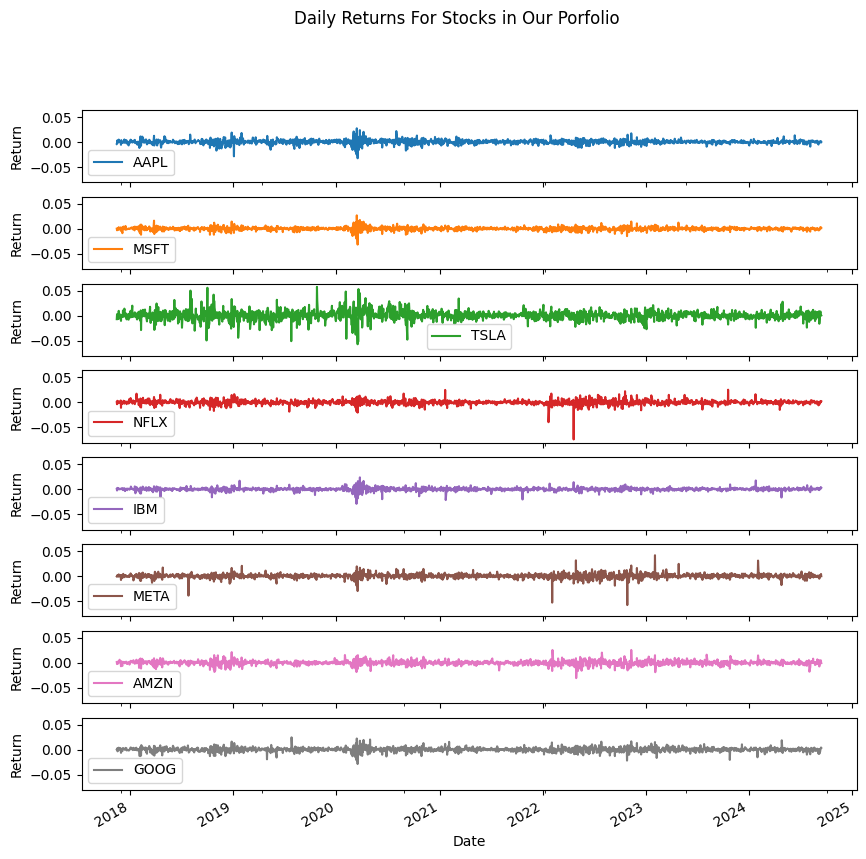

In [7]:
df_return.plot(subplots=True, figsize=(10,10),
               ylabel="Return", xlabel="Date", sharex=True, sharey=True,
               title="Daily Returns For Stocks in Our Porfolio");

### Correlation between each asset

Most of the assets are positively correlated with each other which implies that when a stock price increases for one, 
the others tend to increase as well. 

This doesn't insinuate that there is a causation effect in the increase of prices amongst them.

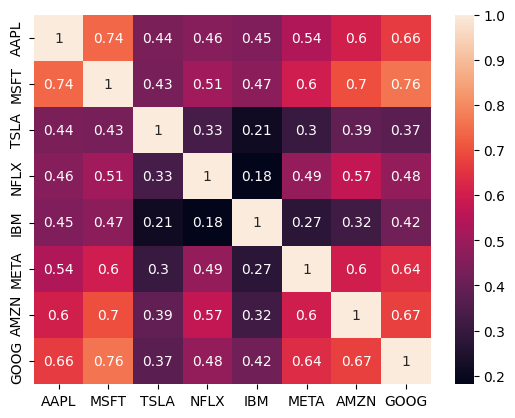

In [8]:
sns.heatmap(df_return.corr(), annot=True);

## Calculating the Annual Average/Mean Return of Each Asset
Tesla has the highest annual average return with almost twice that of the next highest. 

In [9]:
# The stock market is usually opened for 252 days in a year
mean_return = df_return.mean() * 252
mean_return

AAPL    0.055137
MSFT    0.047640
TSLA    0.096848
NFLX    0.034792
IBM     0.013212
META    0.030917
AMZN    0.040711
GOOG    0.039333
dtype: float64

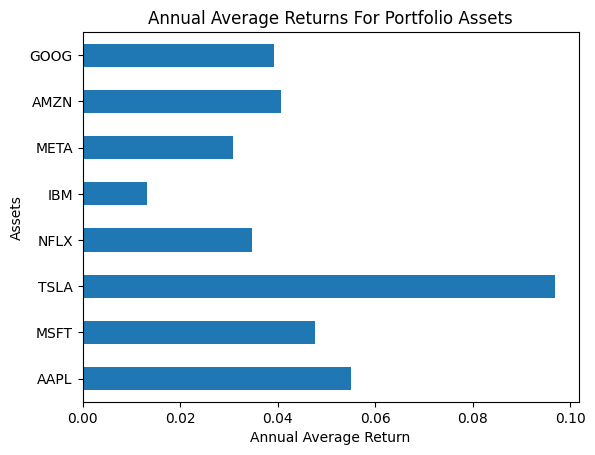

In [10]:
mean_return.plot(kind='barh',xlabel="Annual Average Return", ylabel='Assets', title="Annual Average Returns For Portfolio Assets");

### Defining the number of portfolio Iterations and Generating Random Weights For Each Portfolio

In [28]:
# We are iterating over 50,000 portfolios to find the optimal one
num_portfolio = 50_000

# Generating random weights for each portfolio that add up to 1
weights = np.random.dirichlet(np.ones(len(df.columns)), num_portfolio)

In [32]:
# Converting the weights array into a DataFrame
weights_df = pd.DataFrame(data=weights, columns=df.columns)
weights_df.head()

,AAPL,MSFT,TSLA,NFLX,IBM,META,AMZN,GOOG
0,0.061194,0.126644,0.004642,0.058034,0.224322,0.204095,0.246232,0.074837
1,0.111454,0.112915,0.114000,0.011933,0.335979,0.192259,0.002680,0.118780
2,0.564576,0.105946,0.146799,0.029930,0.047472,0.017719,0.048556,0.039002
3,0.034832,0.279324,0.080971,0.355960,0.040768,0.024170,0.002683,0.181291
4,0.128639,0.008168,0.004823,0.107999,0.319202,0.037093,0.236888,0.157187


### Calculating the Return For Each Portfolio
Portfolio Return = (Mean Return) X (Weights)

In [33]:
portfolio_return = pd.Series(data=weights_df.dot(mean_return), 
                             index=weights_df.index, name='Portfolio Return')
portfolio_return.head()

0    0.034118
1    0.038144
2    0.056120
3    0.043980
4    0.032897
Name: Portfolio Return, dtype: float64

### Calculating the Annual Covariance between Each Asset

Covariance is a statistical tool that measures the directional relationship between the returns on two assets. 
A positive covariance means asset returns move together, while a negative covariance means they move inversely.

In [34]:
df_cov_annual = df_return.cov() * 252
df_cov_annual.head()

,AAPL,MSFT,TSLA,NFLX,IBM,META,AMZN,GOOG
AAPL,0.004783,0.002844,0.004657,0.002471,0.001641,0.002979,0.003042,0.003182
MSFT,0.002844,0.003108,0.003660,0.002210,0.001399,0.002678,0.002832,0.002943
TSLA,0.004657,0.003660,0.023564,0.003990,0.001746,0.003736,0.004321,0.003974
NFLX,0.002471,0.002210,0.003990,0.006083,0.000752,0.003059,0.003253,0.002605
IBM,0.001641,0.001399,0.001746,0.000752,0.002840,0.001177,0.001236,0.001549


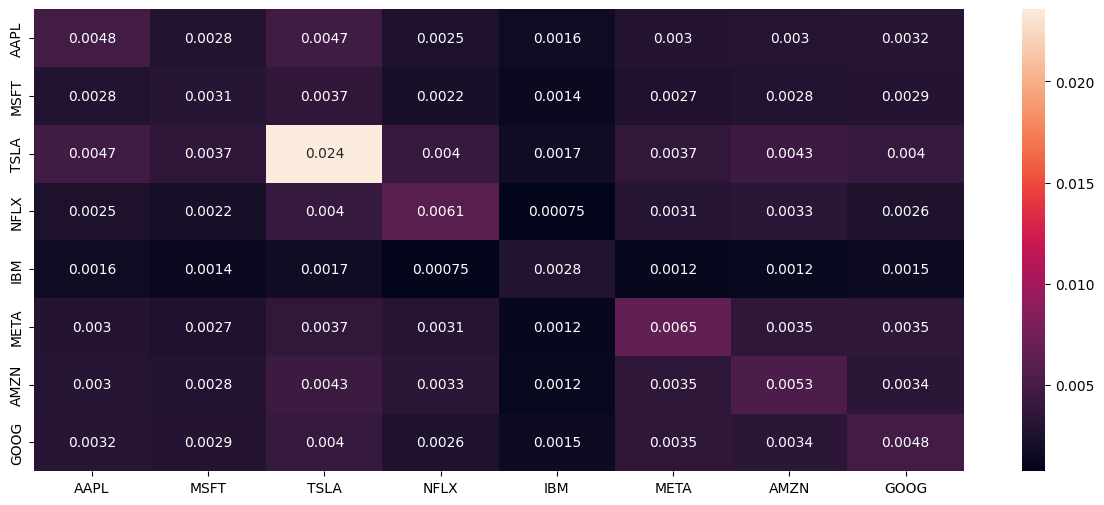

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df_cov_annual, annot=True);

## Calculating the Risk For Each Portfolio



In [35]:
pf_risk = []
for i in range(len(weights_df)):
    risk = np.sqrt(np.dot(weights_df.iloc[i].dot(df_cov_annual), weights_df.iloc[i].transpose()))
    pf_risk.append(risk)

portfolio_risk = pd.Series(pf_risk)
portfolio_risk

0        0.052515
1        0.053496
2        0.064813
3        0.057968
4        0.050373
           ...   
49995    0.050724
49996    0.060682
49997    0.060560
49998    0.066120
49999    0.056821
Length: 50000, dtype: float64

### Calculating the Sharpe Ratio For Each Porfolio

It is a statistical measure used in Modern Portfolio Theory.

The Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. 

It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation/risk of the investment.

We have taken the risk-free return value to be zero for this project.

A portfolio with a higher Sharpe ratio is considered to have best risk-adjusted returns.



In [36]:
sharpe_ratio =  portfolio_return/portfolio_risk
sharpe_ratio.max()

0.9064693863851832

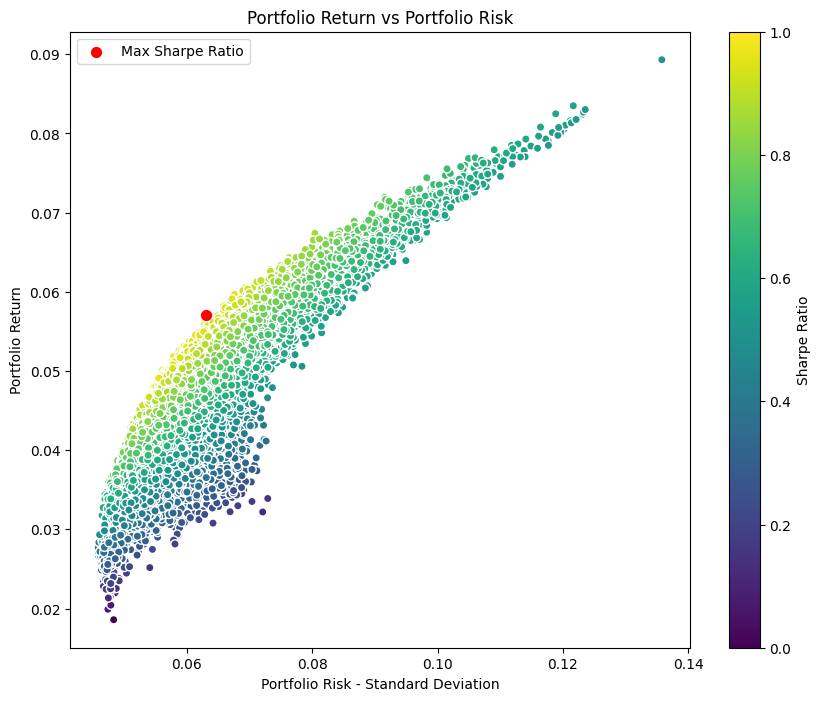

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(portfolio_risk, portfolio_return, c=sharpe_ratio, edgecolors='white')
plt.scatter(portfolio_risk[sharpe_ratio.argmax()], 
            portfolio_return[sharpe_ratio.argmax()], 
            c="red", s=50, label="Max Sharpe Ratio")
plt.xlabel("Portfolio Risk - Standard Deviation")
plt.ylabel("Portfolio Return")
plt.title("Portfolio Return vs Portfolio Risk")
plt.legend()
plt.colorbar(label="Sharpe Ratio");

## Conclusion
The optimal portfolio corresponds to that which has the highest Sharpe Ratio. 

In order to build the optimal portfolio based on assets, the sharpe ratio is considered by many financial analysts to be optimal benchmark.


In [42]:
print(f"In order to optimize your investment of  a return of " 
        f"{np.round(portfolio_return[sharpe_ratio.argmax()] * 100, 2)}% "
        f"with a risk of {np.round(portfolio_risk[sharpe_ratio.argmax()] * 100, 2)}%,\n"
        f"Purchase:")
for i, v in weights_df.iloc[sharpe_ratio.argmax()].items():
    print(f"{np.round(v,2) * 100}% worth of {i} stocks")

In order to optimize your investment of  a return of 5.71% with a risk of 6.3%,
Purchase:
16.0% worth of AAPL stocks
60.0% worth of MSFT stocks
18.0% worth of TSLA stocks
2.0% worth of NFLX stocks
0.0% worth of IBM stocks
1.0% worth of META stocks
2.0% worth of AMZN stocks
1.0% worth of GOOG stocks
